In [1]:
import warnings
warnings.filterwarnings("ignore")
# !pip install ftfy
import ftfy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
from math import exp
from numpy import sign
import sys
print(sys.executable)
from PIL import Image # getting images in notebook
# !pip install gensim
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score
from gensim.models import KeyedVectors
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# !pip install tensorflow

# !pip install tensorflow_hub

# !pip install bert-for-tf2
# !pip install sentencepiece

C:\Users\SHWETANK VERMA\Anaconda3\latest\python.exe


[nltk_data] Downloading package stopwords to C:\Users\SHWETANK
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\SHWETANK
[nltk_data]     VERMA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# !pip install tensorflow

# !pip install tensorflow_hub

# !pip install bert-for-tf2
# !pip install sentencepiece

In [3]:
# from tensorflow import keras 
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
import re
from tqdm import tqdm
import tensorflow as tf
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

In [4]:
train=pd.read_csv(r'C:\Users\SHWETANK VERMA\Documents\Mlstuff\Major-1\Datasets\train.csv')

In [5]:
train.sample(3)

,PID,Text_data,Label
1561,train_pid_1562,Can’t sleep : I developed romantic feelings fo...,moderate
8286,train_pid_8287,"Help. : I'm 24 and I'm useless, I have studies...",severe
5667,train_pid_5668,Please help me save the person i love. He’s go...,moderate


In [6]:
test=pd.read_csv(r'C:\Users\SHWETANK VERMA\Documents\Mlstuff\Major-1\Datasets\dev.csv')

In [7]:
print("Training set has {} rows and {} columns.".format(train.shape[0], train.shape[1]))
print("Test set has {} rows and {} columns.".format(test.shape[0], test.shape[1]))

print()
print(train.columns)
print(test.columns)

Training set has 8891 rows and 3 columns.
Test set has 4496 rows and 3 columns.

Index(['PID', 'Text_data', 'Label'], dtype='object')
Index(['PID', 'Text data', 'Label'], dtype='object')


In [8]:
Sentiment = {'moderate': 1,'not depression': 0,'severe':2}
train.Label = [Sentiment[item] for item in train.Label]
test.Label= [Sentiment[item] for item in test.Label]

In [9]:
train.sample(3)

,PID,Text_data,Label
6823,train_pid_6824,Jan 1st is just like any other day. : It’s bee...,0
3983,train_pid_3984,2020 suck : When your year rings in with you s...,1
3383,train_pid_3384,"I just turned 19 and I'm lost. : Hey guys, I'm...",1


In [10]:
test.sample(3)


,PID,Text data,Label
1808,dev_pid_1809,Depressed and working out : I’ve been sufferin...,1
243,dev_pid_244,2020 : Anyone else feeling like this year is t...,1
974,dev_pid_975,This coroshit makes me suicidal : Will probabl...,1


In [11]:
print('Count NaN:')
print(train.isnull().sum(), '\n')
print('Percentage NaN:')
print(train.isnull().sum()/ len(train))

Count NaN:
PID          0
Text_data    0
Label        0
dtype: int64 

Percentage NaN:
PID          0.0
Text_data    0.0
Label        0.0
dtype: float64


In [12]:
print('Count NaN:')
print(test.isnull().sum(), '\n')
print('Percentage NaN:')
print(test.isnull().sum()/ len(test))

Count NaN:
PID          0
Text data    0
Label        0
dtype: int64 

Percentage NaN:
PID          0.0
Text data    0.0
Label        0.0
dtype: float64


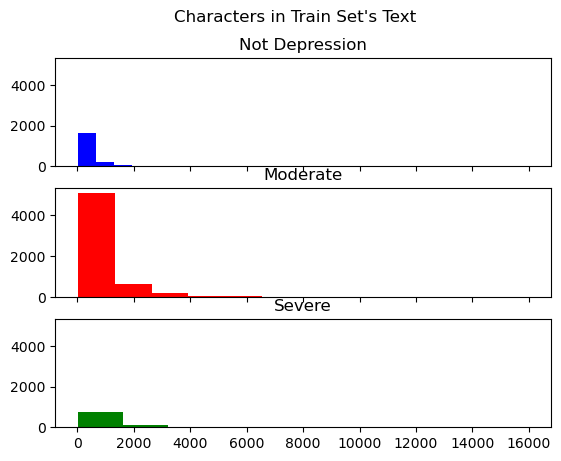

In [12]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
train_len = train[train['Label'] == 0]['Text_data'].str.len()
axs[0].hist(train_len,color='blue')
axs[0].set_title('Not Depression')
train_len = train[train['Label'] == 1]['Text_data'].str.len()
axs[1].hist(train_len,color='red')
axs[1].set_title('Moderate')
train_len = train[train['Label'] == 2]['Text_data'].str.len()
axs[2].hist(train_len,color='green')
axs[2].set_title('Severe')
fig.suptitle('Characters in Train Set\'s Text')
plt.show()

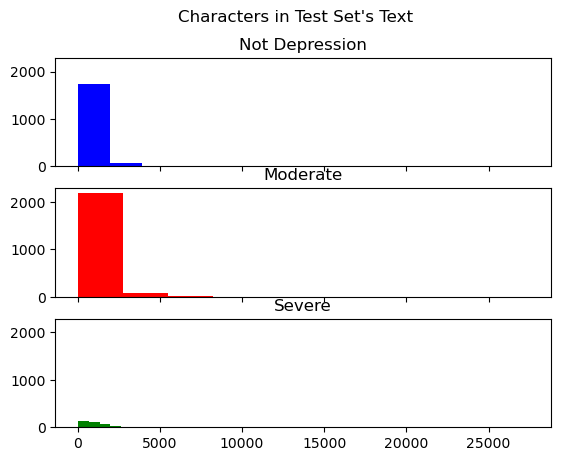

In [13]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
test_len = test[test['Label'] == 0]['Text data'].str.len()
axs[0].hist(test_len,color='blue')
axs[0].set_title('Not Depression')
test_len = test[test['Label'] == 1]['Text data'].str.len()
axs[1].hist(test_len,color='red')
axs[1].set_title('Moderate')
test_len = test[test['Label'] == 2]['Text data'].str.len()
axs[2].hist(test_len,color='green')
axs[2].set_title('Severe')
fig.suptitle('Characters in Test Set\'s Text')
plt.show()

<Figure size 500x500 with 0 Axes>

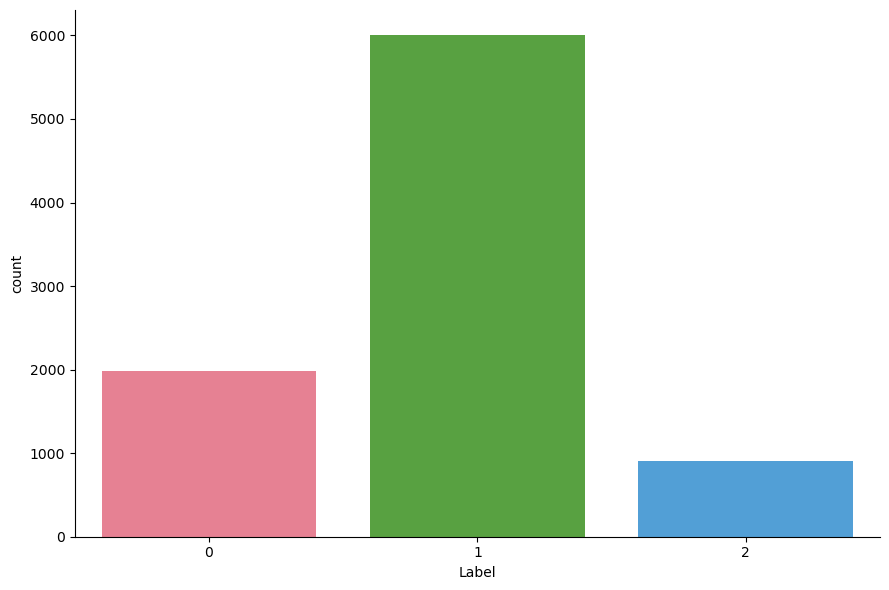

In [14]:
fig = plt.figure(figsize=(5,5))
sns.catplot(x="Label", data=train, kind="count", height=6, aspect=1.5, palette="husl")
plt.show();

In [15]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# NLTK Tweet Tokenizer for now
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)

corpus = []

# clean up text
def clean_text(text):
    """
    Copied from other notebooks
    """
    # expand acronyms
    
    # special characters
    text = re.sub(r"\x89Û_", "", text)
    text = re.sub(r"\x89ÛÒ", "", text)
    text = re.sub(r"\x89ÛÓ", "", text)
    text = re.sub(r"\x89ÛÏWhen", "When", text)
    text = re.sub(r"\x89ÛÏ", "", text)
    text = re.sub(r"China\x89Ûªs", "China's", text)
    text = re.sub(r"let\x89Ûªs", "let's", text)
    text = re.sub(r"\x89Û÷", "", text)
    text = re.sub(r"\x89Ûª", "", text)
    text = re.sub(r"\x89Û\x9d", "", text)
    text = re.sub(r"å_", "", text)
    text = re.sub(r"\x89Û¢", "", text)
    text = re.sub(r"\x89Û¢åÊ", "", text)
    text = re.sub(r"fromåÊwounds", "from wounds", text)
    text = re.sub(r"åÊ", "", text)
    text = re.sub(r"åÈ", "", text)
    text = re.sub(r"JapÌ_n", "Japan", text)    
    text = re.sub(r"Ì©", "e", text)
    text = re.sub(r"å¨", "", text)
    text = re.sub(r"SuruÌ¤", "Suruc", text)
    text = re.sub(r"åÇ", "", text)
    text = re.sub(r"å£3million", "3 million", text)
    text = re.sub(r"åÀ", "", text)
    
    # emojis
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    
    """
    Our Stuff
    """
    # remove numbers
    text = re.sub(r'[0-9]', '', text)
    
    # remove punctuation and special chars (keep '!')
    for p in string.punctuation.replace('!', ''):
        text = text.replace(p, '')
        
    # remove urls
    text = re.sub(r'http\S+', '', text)
    
    # tokenize
    text = tknzr.tokenize(text)
    
    # remove stopwords
    text = [w.lower() for w in text if not w in stop_words]
    corpus.append(text)
    
    # join back
    text = ' '.join(text)
    
    return text

In [16]:
%%time
train['Text_data'] = train['Text_data'].apply(lambda s: clean_text(s))
test['Text data'] = test['Text data'].apply(lambda s: clean_text(s))

# see some cleaned data
train.sample(10)

Wall time: 24.2 s


,PID,Text_data,Label
7973,train_pid_7974,do get unreasonably angry sometimes and calm i...,0
2916,train_pid_2917,alone nye another holiday im tired alone time ...,1
6474,train_pid_6475,we survived another year removed,0
8110,train_pid_8111,im alone i feel im going feeling alone lonely ...,2
4648,train_pid_4649,energy machine broke removed,1
61,train_pid_62,“ the best years life ” cant shake feeling new...,1
3046,train_pid_3047,i lost tonight i hate new years didnt i stay h...,1
7760,train_pid_7761,i feel hopeless i ’ want homeless i ’ want job...,0
3386,train_pid_3387,how i nonreligious help girlfriend religious g...,0
1473,train_pid_1474,birthday todays birthday im already divorced i...,1


In [17]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    # Tokenize the text using spaCy
    doc = nlp(text)
    # Remove stop words and lemmatize the tokens
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and token.is_alpha]
    # Join the tokens back into a string
    return " ".join(tokens)

# Preprocess the training and testing text data
train["Text_data"] = train["Text_data"].apply(preprocess_text)
test["Text data"] = test["Text data"].apply(preprocess_text)

In [18]:
train["Text_data"][0]

'wait mind breakdown new year feeling anymore know little bit worried depressed day time year try breakdown start mere day later break cry entire year december ok month wait weird way act feel feel bit normal'

In [19]:
test["Text data"][0]

'enjoy today tomorrow depression wait today m warm cozy tea complement sandwich crazy time live begin world go shamble feel werid strange came save course debt ill repay m grateful debt crazy dollar change someone situation day not ability relax m clean warm tomorrow reality motel ourself panic past week day exspecially get bless week s sure week till payday not pull loan get to s leave planet fitness okay actually gas wise idk find safe place park extend period time werid d surprised stand panic stay home night kinda like motel buck week maybe scrap car room know remember saving like big deal not wrong be not sneeze like june m seriously consider scrape car guarantee place stay save month idk today m actually sad guess time like week analyze situation rational thought tomorrow get to hunt maybe find random gig d like pay loan early easy work eat march th hurry'

In [20]:
def extractF(df):
    verbs = []
    args = []

    for text in df["Text_data"]:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == "VERB":
                verbs.append(token.text)
                for child in token.children:
                    if child.pos_ != "PUNCT":
                        args.append(child.text)

    # Create a vocabulary of unique verbs and arguments
    vocab = list(set(verbs + args))
    
    for verb in verbs:
        df[verb] = df["Text_data"].apply(lambda x: 1 if verb in x else 0)

    for arg in args:
        df[arg] = df["Text_data"].apply(lambda x: 1 if arg in x else 0)
    
    return vocab

In [21]:
vocab1 = extractF(train)

In [22]:
def extractF2(df):
    verbs = []
    args = []

    for text in df["Text data"]:
        doc = nlp(text)
        for token in doc:
            if token.pos_ == "VERB":
                verbs.append(token.text)
                for child in token.children:
                    if child.pos_ != "PUNCT":
                        args.append(child.text)

    # Create a vocabulary of unique verbs and arguments
    vocab = list(set(verbs + args))
    
    for verb in verbs:
        df[verb] = df["Text data"].apply(lambda x: 1 if verb in x else 0)

    for arg in args:
        df[arg] = df["Text data"].apply(lambda x: 1 if arg in x else 0)
    
    return vocab

In [24]:
vocab2 = extractF2(test)

In [25]:
vocab = list(set(vocab1 + vocab2))
vocab

['incidentally',
 'oppose',
 'stride',
 'groomed',
 'happiness',
 'tarnish',
 'restless',
 'happyi',
 'lull',
 'relocating',
 'importantly',
 'existentialism',
 'refusal',
 'museum',
 'lmk',
 'apparently',
 'abbandone',
 'bong',
 'stench',
 'trading',
 'photo',
 'wnat',
 'umbearable',
 'seperate',
 'nod',
 'minimum',
 'recluse',
 'lecture',
 'basement',
 'pleasing',
 'clear',
 'awayi',
 'court',
 'duck',
 'rightand',
 'prelim',
 'liar',
 'kissable',
 'menot',
 'context',
 'popular',
 'selfisolation',
 'radius',
 'wrecking',
 'naturally',
 'consultant',
 'tommorow',
 'temple',
 'cushion',
 'wormth',
 'innconvience',
 'exhusband',
 'protect',
 'craigslist',
 'loweffort',
 'benefit',
 'furiously',
 'seil',
 'opportunity',
 'getting',
 'celebrated',
 'list',
 'thisdarkness',
 'creepy',
 'elementary',
 'meal',
 'intense',
 'friday',
 'injure',
 'beautybut',
 'healer',
 'bartender',
 'guiltywhich',
 'excersize',
 'accepted',
 'displacement',
 'burn',
 'harvard',
 'thanksgiving',
 'pga',
 'fa

In [26]:
texts = train['Text_data'].to_numpy()
word_freq = {}

for text in texts:
    for word in text.split():
        word_freq[word] = word_freq.get(word, 0) + 1

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_SEQUENCE_LENGTH = 40

tokenizer = Tokenizer()

tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
num_words = len(word_index) + 1
print('Found %s unique tokens.' % (num_words - 1))

# pad 
data = pad_sequences(
    sequences, 
    maxlen=MAX_SEQUENCE_LENGTH,
    padding='post', 
    truncating='post'
)

labels = train['Label'].to_numpy()
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10272 unique tokens.
Shape of data tensor: (8891, 40)
Shape of label tensor: (8891,)


In [28]:
x_train = data
y_train = labels

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import roc_auc_score

vectorizer = CountVectorizer(vocabulary=vocab)
x_train_vectorized = vectorizer.fit_transform(train['Text_data'])

# print vocabulary
print(vectorizer.get_feature_names()[2500:2600])

['ypu', 'confused', 'jitsu', 'dormant', 'pathologically', 'atleast', 'sicidenor', 'bail', 'heartsandmind', 'ldr', 'oh', 'worthlessness', 'paranoidc', 'incessantly', 'stink', 'laboratory', 'chirping', 'politely', 'asian', 'reassure', 'capacity', 'watts', 'enable', 'mom', 'fuss', 'naughty', 'well', 'tom', 'impede', 'freefall', 'achy', 'detail', 'coincidentally', 'glowing', 'suicidalselfharme', 'belove', 'housework', 'disability', 'trailer', 'relax', 'toss', 'depakote', 'tube', 'awry', 'toughe', 'het', 'devote', 'pleaser', 'spaniard', 'sleepthat', 'slowi', 'pregnant', 'unholy', 'broken', 'barclub', 'responsive', 'plan', 'worm', 'listeningand', 'смс', 'preoccupie', 'ish', 'bc', 'awaken', 'stitch', 'rx', 'lexapro', 'undone', 'meds', 'vote', 'homeworkout', 'essence', 'haved', 'pharmacy', 'willl', 'unrealistic', 'foreclose', 'itselffor', 'glum', 'supported', 'idotk', 'choicesthen', 'dip', 'allowing', 'camel', 'competitive', 'client', 'whst', 'ceiling', 'crash', 'clothing', 'plot', 'record', '

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [31]:
X_train, X_cv, Y_train, Y_cv = train_test_split(train["Text_data"], train["Label"], test_size = 0.3, random_state=42)

In [32]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(6223, 9897)


In [33]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(2668, 9897)


In [34]:
X_test = vectorizer.transform(test["Text data"])
X_test = X_test.toarray()
print(X_test.shape)

(4496, 9897)


In [35]:
vocab = vectorizer.get_feature_names()
print(f"Printing first 100 vocabulary samples:\n{vocab[:100]}")

Printing first 100 vocabulary samples:
['incidentally', 'oppose', 'stride', 'groomed', 'happiness', 'tarnish', 'restless', 'happyi', 'lull', 'relocating', 'importantly', 'existentialism', 'refusal', 'museum', 'lmk', 'apparently', 'abbandone', 'bong', 'stench', 'trading', 'photo', 'wnat', 'umbearable', 'seperate', 'nod', 'minimum', 'recluse', 'lecture', 'basement', 'pleasing', 'clear', 'awayi', 'court', 'duck', 'rightand', 'prelim', 'liar', 'kissable', 'menot', 'context', 'popular', 'selfisolation', 'radius', 'wrecking', 'naturally', 'consultant', 'tommorow', 'temple', 'cushion', 'wormth', 'innconvience', 'exhusband', 'protect', 'craigslist', 'loweffort', 'benefit', 'furiously', 'seil', 'opportunity', 'getting', 'celebrated', 'list', 'thisdarkness', 'creepy', 'elementary', 'meal', 'intense', 'friday', 'injure', 'beautybut', 'healer', 'bartender', 'guiltywhich', 'excersize', 'accepted', 'displacement', 'burn', 'harvard', 'thanksgiving', 'pga', 'fade', 'cripplingly', 'cosign', 'problem', 

In [36]:
distribution = np.sum(X_train, axis=0)

print("Printing first 100 vocab-dist pairs:")

for tag, count in zip(vocab[:100], distribution[:100]):
    print(count, tag)

Printing first 100 vocab-dist pairs:
2 incidentally
0 oppose
0 stride
1 groomed
278 happiness
0 tarnish
11 restless
0 happyi
3 lull
0 relocating
34 importantly
1 existentialism
7 refusal
2 museum
0 lmk
71 apparently
5 abbandone
5 bong
0 stench
0 trading
24 photo
0 wnat
10 umbearable
6 seperate
0 nod
23 minimum
11 recluse
21 lecture
16 basement
0 pleasing
77 clear
0 awayi
24 court
0 duck
0 rightand
2 prelim
23 liar
6 kissable
10 menot
18 context
18 popular
0 selfisolation
0 radius
4 wrecking
31 naturally
0 consultant
0 tommorow
0 temple
2 cushion
3 wormth
0 innconvience
7 exhusband
15 protect
1 craigslist
0 loweffort
8 benefit
7 furiously
0 seil
58 opportunity
118 getting
1 celebrated
30 list
0 thisdarkness
10 creepy
19 elementary
14 meal
30 intense
10 friday
16 injure
1 beautybut
0 healer
7 bartender
0 guiltywhich
0 excersize
0 accepted
0 displacement
58 burn
0 harvard
9 thanksgiving
0 pga
32 fade
0 cripplingly
0 cosign
592 problem
0 rhrough
1 homosexuality
156 consider
1 widely
0 vent

In [38]:
forest = RandomForestClassifier() 
forest = forest.fit( X_train, Y_train)

In [39]:
predictions = forest.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.8766866566716641


In [40]:
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

           0       0.94      0.66      0.77       598
           1       0.86      0.99      0.92      1797
           2       0.98      0.63      0.76       273

    accuracy                           0.88      2668
   macro avg       0.92      0.76      0.82      2668
weighted avg       0.89      0.88      0.87      2668



In [41]:
#using tf-idf

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
X_train, X_test , y_train, y_test = train_test_split(train['Text_data'].values,train['Label'].values,test_size=0.2,random_state=123,stratify=train['Label'].values)
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [44]:
classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [45]:
y_pred = classifier.predict(tfidf_test_vectors)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.70      0.80       397
           1       0.87      0.99      0.92      1201
           2       0.97      0.67      0.79       181

    accuracy                           0.89      1779
   macro avg       0.93      0.79      0.84      1779
weighted avg       0.90      0.89      0.88      1779



In [47]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.8892636312535133


In [48]:
# Split data into train and test sets
import gensim
X_train, X_test, y_train, y_test = train_test_split (train['Text_data'], train['Label'] , test_size=0.2)
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   min_count=2)

In [49]:
w2v_model.wv.index_to_key

[' ',
 'e',
 't',
 'a',
 'i',
 'o',
 'l',
 'n',
 'r',
 's',
 'd',
 'p',
 'h',
 'c',
 'y',
 'm',
 'g',
 'u',
 'f',
 'k',
 'w',
 'b',
 'v',
 'x',
 'j',
 'z',
 'q',
 'о',
 'н',
 'а',
 'т',
 'и',
 'е',
 'д',
 'у',
 'с',
 'в',
 'я',
 'р',
 'м',
 'п',
 'ь',
 'ч',
 'к',
 'з',
 'л',
 'й',
 'ж',
 'х',
 'г',
 'ы',
 'é',
 'б',
 'ш',
 'ю',
 'ę',
 'ș',
 'ł',
 'ą']

In [50]:
words = set(w2v_model.wv.index_to_key )
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test])

In [51]:

for i, v in enumerate(X_train_vect):
    print(len(X_train.iloc[i]), len(v))

21 21
175 175
762 762
23 23
1385 1385
438 438
317 317
168 168
527 527
61 61
272 272
133 133
709 709
132 132
68 68
66 66
320 320
80 80
521 521
77 77
311 311
19 19
599 599
249 249
1385 1385
45 45
120 120
388 388
648 648
227 227
901 901
192 192
118 118
161 161
88 88
76 76
146 146
22 22
23 23
79 79
52 52
1162 1162
176 176
19 19
29 29
379 379
206 206
30 30
2395 2395
54 54
403 403
2550 2550
424 424
419 419
70 70
1266 1266
120 120
77 77
22 22
143 143
74 74
175 175
99 99
36 36
512 512
331 331
1361 1361
134 134
691 691
363 363
302 302
272 272
253 253
1060 1060
232 232
316 316
209 209
50 50
284 284
223 223
176 176
292 292
52 52
427 427
59 59
66 66
106 106
52 52
139 139
51 51
51 51
51 51
102 102
305 305
856 856
88 88
181 181
637 637
216 216
317 317
1007 1007
1325 1325
45 45
424 424
142 142
23 23
386 386
81 81
539 539
139 139
242 242
924 924
1283 1283
85 85
112 112
136 136
136 136
195 195
160 160
150 150
85 85
345 345
19 19
59 59
973 973
195 195
378 378
281 281
22 22
244 244
25 25
293 293
209 209


In [52]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [53]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(X_train_vect_avg):
    print(len(X_train.iloc[i]), len(v))

21 100
175 100
762 100
23 100
1385 100
438 100
317 100
168 100
527 100
61 100
272 100
133 100
709 100
132 100
68 100
66 100
320 100
80 100
521 100
77 100
311 100
19 100
599 100
249 100
1385 100
45 100
120 100
388 100
648 100
227 100
901 100
192 100
118 100
161 100
88 100
76 100
146 100
22 100
23 100
79 100
52 100
1162 100
176 100
19 100
29 100
379 100
206 100
30 100
2395 100
54 100
403 100
2550 100
424 100
419 100
70 100
1266 100
120 100
77 100
22 100
143 100
74 100
175 100
99 100
36 100
512 100
331 100
1361 100
134 100
691 100
363 100
302 100
272 100
253 100
1060 100
232 100
316 100
209 100
50 100
284 100
223 100
176 100
292 100
52 100
427 100
59 100
66 100
106 100
52 100
139 100
51 100
51 100
51 100
102 100
305 100
856 100
88 100
181 100
637 100
216 100
317 100
1007 100
1325 100
45 100
424 100
142 100
23 100
386 100
81 100
539 100
139 100
242 100
924 100
1283 100
85 100
112 100
136 100
136 100
195 100
160 100
150 100
85 100
345 100
19 100
59 100
973 100
195 100
378 100
281 100
22 100

In [54]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [55]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       407
           1       0.89      0.97      0.93      1201
           2       0.99      0.61      0.76       171

    accuracy                           0.89      1779
   macro avg       0.92      0.78      0.83      1779
weighted avg       0.89      0.89      0.89      1779



In [57]:
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.8909499718943227


In [58]:
# sentence_encoder_layer = hub.KerasLayer(
#     "https://tfhub.dev/google/universal-sentence-encoder/4"
# )

In [59]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# import tensorflow_decision_forests as tfdf
# model = keras.Sequential()
# inputs = layers.Input(shape=(), dtype=tf.string)
# outputs = sentence_encoder_layer(inputs)
# preprocessor = keras.Model(inputs=inputs, outputs=outputs)
# model_1 = tfdf.keras.GradientBoostedTreesModel(preprocessing=preprocessor)

In [60]:
# model_2 = tfdf.keras.GradientBoostedTreesModel()

In [61]:
# # Compiling model_1
# model_1.compile(metrics=["Accuracy", "Recall", "Precision", "AUC"])
# # Here we do not specify epochs as, TF-DF trains exactly one epoch of the dataset
# model_1.fit(train)

# # Compiling model_2
# model_2.compile(metrics=["Accuracy", "Recall", "Precision", "AUC"])
# # Here we do not specify epochs as, TF-DF trains exactly one epoch of the dataset
# model_2.fit(train)

In [62]:
# logs_1 = model_1.make_inspector().training_logs()
# print(logs_1)

In [63]:
# logs_2 = model_2.make_inspector().training_logs()
# print(logs_2)

In [64]:
# print("model_1 summary: ")
# print(model_1.summary())
# print()
# print("model_2 summary: ")
# print(model_2.summary())

In [65]:
# results = model_1.evaluate(test, return_dict=True, verbose=0)
# print("model_1 Evaluation: \n")
# for name, value in results.items():
#     print(f"{name}: {value:.4f}")

# results = model_2.evaluate(test, return_dict=True, verbose=0)
# print("model_2 Evaluation: \n")
# for name, value in results.items():
#     print(f"{name}: {value:.4f}")

In [66]:
# test.reset_index(inplace=True, drop=True)
# for index, row in test.iterrows():
#     text = tf.expand_dims(row["Text data"], axis=0)
#     preds = model_1.predict_step(text)
#     preds = tf.squeeze(tf.round(preds))
#     print(f"Text: {row['Text data']}")
#     print(f"Prediction: {int(preds)}")
#     print(f"Ground Truth : {row['Label']}")
#     if index == 10:
#         break

In [67]:

total_vocabulary =set(word for tweet in train for word in tweet)
len(total_vocabulary)

print('There are {} unique tokens in the dataset.'.format(
    len(total_vocabulary)))

There are 53 unique tokens in the dataset.


In [68]:
# glove = {}

# with open(r'C:\Users\aanan\Documents\Major-1\glove.twitter.27B.100d.txt', 'rb') as f:

#     for line in f:

#         parts = line.split()

#         word = parts[0].decode('utf-8')

#         if word in total_vocabulary: 
#             vector = np.array(parts [1:], dtype=np.float32)
#             glove[word] = vector

In [69]:
# class W2vVectorizer(object):
#     def __init__(self, w2v): 
#         #Takes in a dictionary of words and vectors as input self.dimensions = len(w2v[next (iter(glove))])
#         self.w2v = w2v
#         if len(w2v) == 0:
#             self.dimensions = 0
#         else:
#             self.dimensions = len(w2v[next(iter(glove))])
#         # Note: Even though it doesn't do anything,
#         #it's required that this object implement a fit method 
#         # or else it can't be used in a scikit-learn pipeline

#         def fit(self, X, y):
#             return self

#         def transform(self, X):
#             #X should be a series of lists of tokens
#             return np.array([
#                 np.mean([self.w2v[w] for w in words if w in self.w2v]
#                     or [np.zeros(self.dimensions)], axis=0) for words in X])



In [70]:
# Instantiate a mean word embedding vectorizer using glove embeddings

vectorizer = W2vVectorizer(glove)

NameError: name 'W2vVectorizer' is not defined

In [ ]:
#Use vectorizer to transform tokenized data to vectors
type(train)
# X_glove = vectorizer.transform(train['Text_data'])

In [65]:
!pip install fasttext

In [67]:
import fasttext.util

In [68]:
ft = fasttext.load_model('cc.en.300.bin')

In [69]:
ft.get_dimension()

300

In [72]:
ft.get_nearest_neighbors('sad')

[(0.7654699683189392, 'saddening'),
 (0.7333880662918091, 'sadder'),
 (0.7270680665969849, 'sad.The'),
 (0.7142772078514099, 'sad.This'),
 (0.7122252583503723, 'sad.I'),
 (0.7057977318763733, 'saddened'),
 (0.7021587491035461, 'sad.It'),
 (0.7002950310707092, 'sad.And'),
 (0.6964119672775269, 'sad.But'),
 (0.6918020248413086, 'Sad')]

In [74]:
embedding_vector_length = 50

In [75]:
max_features = 5000

In [76]:
#Initialize embedding matrix
embedding_matrix_fasttext = np.zeros((max_features + 1, embedding_vector_length))
print(embedding_matrix_fasttext.shape)

(5001, 50)


In [78]:
token=tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
token.fit_on_texts(train.Text_data)

In [79]:
word_index = token.word_index

In [80]:
for word, i in sorted(token.word_index.items(),key=lambda x:x[1]):
    if i > (max_features+1):
        break
    try:
        embedding_vector = ft[word] #Reading word's embedding from Glove model for a given word
        embedding_matrix_fasttext[i] = embedding_vector
    except:
        pass

In [90]:
# A simpleRNN without any pretrained embeddings and one dense layer
from keras.models import Sequential
from tqdm import tqdm
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
model = Sequential()
maxlen = 500
model.add(tf.keras.layers.Embedding(max_features + 1, #Vocablury size
                                    embedding_vector_length, #Embedding size
                                    weights=[embedding_matrix_fasttext], #Embeddings taken from pre-trained model
                                    trainable=False, #As embeddings are already available, we will not train this layer. It will act as lookup layer.
                                    input_length=maxlen) #Number of words in each review
         )
model.add(SimpleRNN(100))
model.add(Dense(6, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 50)           250050    
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               15100     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 265,756
Trainable params: 15,706
Non-trainable params: 250,050
_________________________________________________________________


In [121]:
X_train, X_test, y_train, y_test = train_test_split(train.Text_data.values, train.Label.values,  
                                                  random_state=42, 
                                                  test_size=0.2)

In [122]:
X_train_seq=token.texts_to_sequences(X_train)
X_test_seq=token.texts_to_sequences(X_test)


In [107]:
import tensorflow 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [123]:
X_train_pad = tensorflow.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = tensorflow.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=maxlen)

In [126]:
y_train = y_train[0:1779]
X_train_pad = X_train_pad[0:1779]
y_test = y_test[0:1779]

print(X_train_pad.shape[0]," ",y_train.shape[0]," ",X_test_pad.shape[0]," ",y_test.shape[0])

1779   1779   1779   1779


In [125]:
history = model.fit(X_train_pad,
                    y_train,
                    epochs=3,
                    batch_size=32,          
                    validation_data=(X_test_pad, y_test))

Epoch 1/3


ValueError: in user code:

    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\SHWETANK VERMA\Anaconda3\latest\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 6) vs (None, 1)).
